<a href="https://colab.research.google.com/github/weyj4/GCP_ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('weight-height.csv')

In [95]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [96]:
def line(x, w=0, b=0):
  return x * w + b

x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=0)

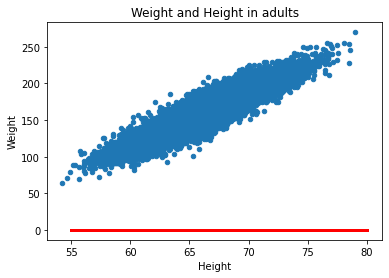

In [97]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

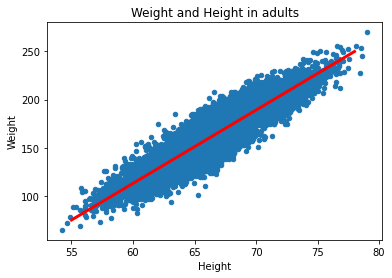

In [98]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [99]:
def mean_squared_error(y_true, y_pred):
  s = (y_true - y_pred) ** 2
  return s.mean()

In [100]:
X = df[['Height']].values
y_true = df['Weight'].values

In [101]:
y_pred = line(X)
mean_squared_error(y_true, y_pred)

27093.83757456164

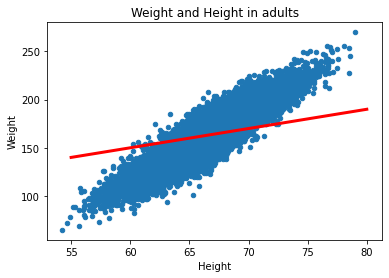

In [102]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
yhat = line(x, w=2, b=30)
plt.plot(x, yhat, color='red', linewidth=3)

In [103]:
y_pred = line(X, w=2, b=30)
mean_squared_error(y_true, y_pred)

1091.7331398106144

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [105]:
model = Sequential()

In [106]:
model.add(Dense(1, input_shape=(1,)))

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
109/313 [=========>....................] - ETA: 0s - loss: 1061.1128

In [ ]:
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height')
plt.plot(X, y_pred, color='red')

In [ ]:
mean_squared_error(y_true, y_pred)

In [ ]:
W, B = model.get_weights()
print(W, B)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [118]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [119]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

63/63 [==============================] - 0s 2ms/step


In [120]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [121]:
print(mse(y_train, y_train_pred))
print(mse(y_test, y_test_pred))

162.47438128815776
164.69273736720683


In [122]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8420347172380754
0.8416449730811939


In [129]:
df = pd.read_csv('user_visit_duration.csv')

In [130]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


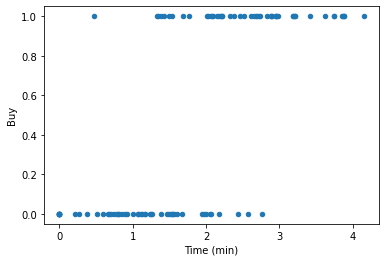

In [131]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [132]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [133]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [134]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [135]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 [==============================] - 1s 6ms/step - loss: 0.7041 - accuracy: 0.4800
Epoch 2/25
4/4 [==============================] - 0s 14ms/step - loss: 0.6071 - accuracy: 0.6000
Epoch 3/25
4/4 [==============================] - 0s 11ms/step - loss: 0.5874 - accuracy: 0.6100
Epoch 4/25
4/4 [==============================] - 0s 10ms/step - loss: 0.5685 - accuracy: 0.7000
Epoch 5/25
4/4 [==============================] - 0s 7ms/step - loss: 0.5339 - accuracy: 0.8500
Epoch 6/25
4/4 [==============================] - 0s 7ms/step - loss: 0.5187 - accuracy: 0.8000
Epoch 7/25
4/4 [==============================] - 0s 8ms/step - loss: 0.4961 - accuracy: 0.8100
Epoch 8/25
4/4 [==============================] - 0s 8ms/step - loss: 0.4785 - accuracy: 0.8000
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7700
Epoch 10/25
4/4 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7900
Epoch 11/25
4/4 [===================

2/2 [==============================] - 0s 7ms/step


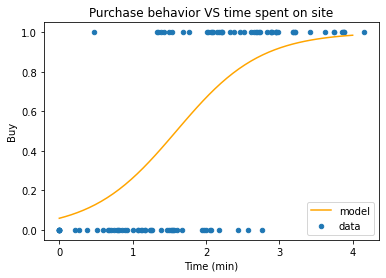

In [139]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [141]:
temp_class = model.predict(temp) > 0.5

2/2 [==============================] - 0s 5ms/step


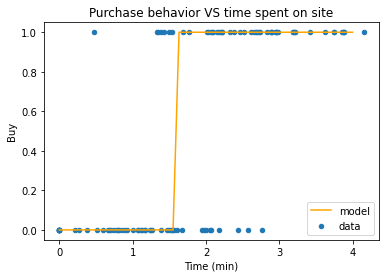

In [142]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [146]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

4/4 [==============================] - 0s 4ms/step


In [147]:
from sklearn.metrics import accuracy_score

In [148]:
print('The accuracy score is', accuracy_score(y, y_class_pred))

The acuracy score is 0.82


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [155]:
print('The accuracy score is', accuracy_score(y, model.predict(X) > 0.5))

4/4 [==============================] - 0s 6ms/step
The accuracy score is 0.5


In [156]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [157]:
print('The train accuracy is', accuracy_score(y_train, model.predict(X_train) > 0.5))
print('The test accuracy is', accuracy_score(y_test, model.predict(X_test) > 0.5))

3/3 [==============================] - 0s 9ms/step
The train accuracy is 0.825
1/1 [==============================] - 0s 55ms/step
The test accuracy is 0.85
